In [107]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
from gym_extensions.continuous.gym_navigation_2d.env_generator import EnvironmentGenerator, Environment
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cmx
import matplotlib.colors as colors
import numpy as np

def get_cmap(N):
    '''Returns a function that maps each index in 0, 1, ... N-1 to a distinct 
    RGB color.'''
    color_norm  = colors.Normalize(vmin=0, vmax=N-1)
    scalar_map = cmx.ScalarMappable(norm=color_norm, cmap='hsv') 
    def map_index_to_rgb_color(index):
        return scalar_map.to_rgba(index)
    return map_index_to_rgb_color


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [129]:
eg = EnvironmentGenerator(x_range=[0, 50], y_range=[0, 50], width_range=[1, 8], height_range=[1,8])
centers, widths, heights = eg.sample_axis_aligned_rectangles(density=0.01)
obstacles = eg.merge_rectangles_into_obstacles(centers, widths, heights, epsilon=0.2)
world = Environment(eg.x_range, eg.y_range, obstacles)


<IPython.core.display.Javascript object>


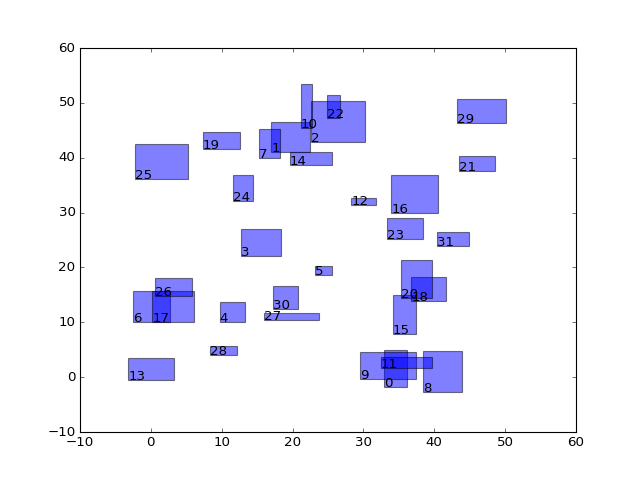

<IPython.core.display.Javascript object>


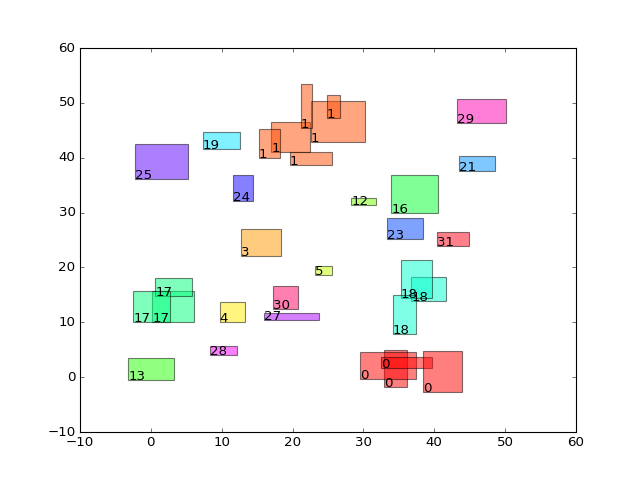

(-10.0, 60.0, -10.0, 60.0)

In [130]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, aspect='equal')
for i in xrange(len(centers)):
    c,w,h = centers[i], widths[i], heights[i]
    bl = c.reshape((c.shape[0],)) - np.array([w[0]/2., h[0]/2.])
    ax1.add_patch(patches.Rectangle(bl, w, h, alpha=0.5))
    plt.text(bl[0], bl[1], str(i))
    
plt.axis('auto')

cmap = get_cmap(len(obstacles))

fig2 = plt.figure()
ax2 = fig2.add_subplot(111, aspect='equal')
ci = -1
for i in obstacles:
    ci += 1
    obs = obstacles[i]
    for c,w,h in zip(obs.rectangle_centers, obs.rectangle_widths, obs.rectangle_heights):
        bl = c.reshape((c.shape[0],)) - np.array([w/2., h/2.])
        ax2.add_patch(patches.Rectangle(bl, w, h, alpha=0.5, label=str(i), facecolor=cmap(ci))) #fill=None))
        plt.text(bl[0], bl[1], str(i))
        
plt.axis('auto')

In [131]:
from rrt import *

rrt_planner = RRT(world)
start_state = State(5, 5, None)
end_state = State(40,50, None)
tree_nodes= []
plans = []
for i in xrange(5):
    plan, _ = rrt_planner.plan(start_state, end_state, max_num_steps=1000, max_steering_radius=2, dest_reached_radius=5)
    plans.append(plan)

#homology_vector = rrt_planner.world.homology_vector(plan)

<IPython.core.display.Javascript object>


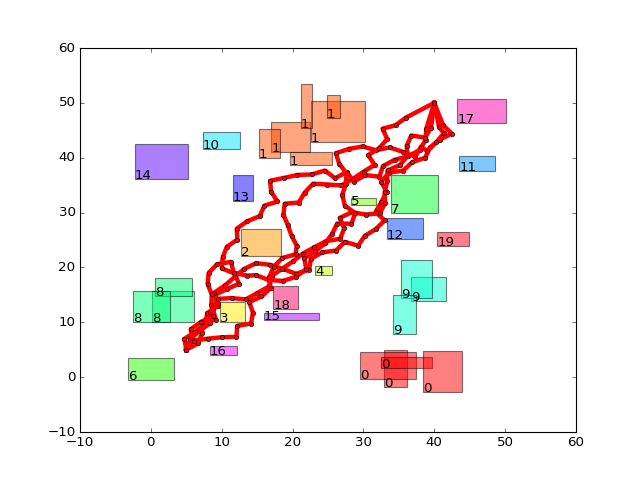

[False  True  True  True False  True False False  True  True False  True
  True False  True False  True  True  True  True False]


(-10.0, 60.0, -10.0, 60.0)

In [132]:
cmap = get_cmap(len(obstacles))
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ci = -1
for i in obstacles:
    ci += 1
    obs = obstacles[i]
    for c,w,h in zip(obs.rectangle_centers, obs.rectangle_widths, obs.rectangle_heights):
        bl = c.reshape((c.shape[0],)) - np.array([w/2., h/2.])
        ax.add_patch(patches.Rectangle(bl, w, h, alpha=0.5, label=str(i), facecolor=cmap(ci))) #fill=None))
        plt.text(bl[0], bl[1], str(ci))
        
for plan in plans:
    x = [s.x for s in plan]
    y = [s.y for s in plan]
    plt.plot(x, y, 'o-r', ms=4, lw=4)

tx = [s.x for s in tree_nodes]
ty = [s.y for s in tree_nodes]
plt.plot(tx, ty, 'o', ms=3, mfc='gray')

for s in tree_nodes:
    for sc in s.children:
        plt.plot([s.x, sc.x], [s.y, sc.y], '-', ms=2, c='gray')

print homology_vector > 0
plt.axis('auto')

In [133]:
smooth_plans = []
for plan in plans:
    smooth_plan = rrt_planner.smooth(plan, alpha=20, rate=0.01, max_iterations=20)
    smooth_plans.append(smooth_plan)
    

<IPython.core.display.Javascript object>


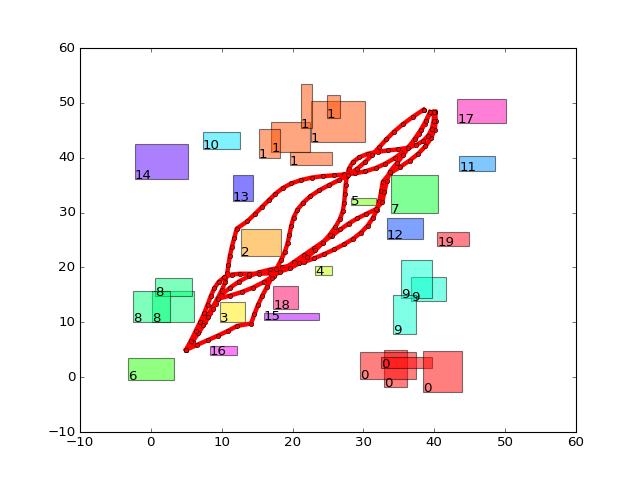

(-10.0, 60.0, -10.0, 60.0)

In [134]:
cmap = get_cmap(len(obstacles))
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ci = -1
for i in obstacles:
    ci += 1
    obs = obstacles[i]
    for c,w,h in zip(obs.rectangle_centers, obs.rectangle_widths, obs.rectangle_heights):
        bl = c.reshape((c.shape[0],)) - np.array([w/2., h/2.])
        ax.add_patch(patches.Rectangle(bl, w, h, alpha=0.5, label=str(i), facecolor=cmap(ci))) #fill=None))
        plt.text(bl[0], bl[1], str(ci))
   
for smooth_plan in smooth_plans:
    x = [s.x  for s in smooth_plan]
    y = [s.y  for s in smooth_plan]
    plt.plot(x, y, 'o-r', ms=4, lw=4)

tx = [s.x for s in tree_nodes]
ty = [s.y for s in tree_nodes]
plt.plot(tx, ty, 'o', ms=3, mfc='gray')

for s in tree_nodes:
    for sc in s.children:
        plt.plot([s.x, sc.x], [s.y, sc.y], '-', ms=2, c='gray')

plt.axis('auto')